## **About Dataset**

**Context**

- This notebook's goal is to create a product recommendation system for Amazon's items. Amazon and other online e-commerce platforms rely heavily on recommendation algorithms to deliver personalised product recommendations to its consumers. These systems analyse user behaviour, purchase history, and preferences to make accurate and relevant suggestions, improving the user experience and boosting sales.

- In this project, I'll be using a dataset from the Amazon Reviews data source. The dataset has four main attributes: UserID, ProductID, Rating, and Timestamp. The UserID is a one-of-a-kind identifier for each person, whereas the ProductID is a one-of-a-kind identifier for each product. The Rating property represents the rating given by a certain user for a particular product. Finally, the timestamp element keeps track of when the rating was supplied.

- We will utilise advanced approaches such as collaborative filtering to construct the recommendation model, which discovers patterns and similarities between people and things to provide personalised suggestions. Collaborative filtering compares users' prior behaviour, such as purchases and reviews, to comparable users and their interests, resulting in a suggestion list based on these matches.

- The project's goal is to create a strong and efficient recommendation engine capable of handling the massive quantity of data accessible on Amazon's electrical items. Amazon may utilise this technology to deliver personalised and relevant recommendations to its users, resulting in better customer satisfaction and perhaps higher sales.


**Content**

This is a dataset related to over 2 Million customer reviews and ratings of Beauty related products sold on their website, it is from kaggle: https://www.kaggle.com/datasets/skillsmuggler/amazon-ratings.

It contains:

- The unique UserId (Customer Identification).
- The product ASIN (Amazon's unique product identification code for each product).
- Ratings (ranging from 1-5 based on customer satisfaction).
- The Timestamp of the rating (in UNIX time).

## **Import Libraries**

For this task, we need to import numpy, pandas, seaborn, matplotlib.

- NumPy to perform a mathematical operations on arrays.

- Pandas to read the data and analysis it.

- Seaborn to make statistical graphics.

- Matplotlib to visualize data.

- Sklearn to make statistical modeling.

In [1]:
# import needed libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn
from sklearn.decomposition import TruncatedSVD
import random

# %matplotlib inline
plt.style.use("fivethirtyeight")
import plotly.graph_objects as go

# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## **Read The Dataset**

To read the datasets, we used the read csv function from pandas.

In [2]:
# load the dataset
amzn_ratings = pd.read_csv('Tenrec/ratings_Beauty.csv')

## **Data Exploration and Cleaning**

Before the data is processed, an exploratory data analysis phase is performed to analyse the data, find patterns, and test assumptions using statistical summaries and graphical plots. 

It contains:

- The head and tail of the dataframes.

- The size and shape of the dataframes. 

- The different data types of features.

- Extract useful informations or relations between columns or dataframes. 

- Check for duplicates and remove them.

- Check for null values and handling them. 

- Show the column's distribution.

In [3]:
# show the top 5 and last 5 of dataset
amzn_ratings.head()
amzn_ratings.tail()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


,UserId,ProductId,Rating,Timestamp
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200
2023069,A1PB6OT0OOPKNQ,B00LU0LTOU,5.0,1405641600


In [4]:
# check for the shape of dataset
amzn_ratings.shape

(2023070, 4)

From the shape, we can notice that our dataset has 2023070 samples and 4 feauters.

In [5]:
# show information about dataset (the feature types, missing values, size, and memory usage)
amzn_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


The dataset has three data types which are object, float64, and int64.

In [6]:
# check for missing values
amzn_ratings.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [7]:
# check for duplicates
amzn_ratings.duplicated().sum()

0

Tha dataset is clean with no missing values and no duplicates.

In [8]:
# display the number of users ,products ,and the total ratings 
print('Unique number of users equals ',len(amzn_ratings.UserId.unique()))
print('Unique number of products equals ',len(amzn_ratings.ProductId.unique()))
print('Unique number of ratings equals ',amzn_ratings.shape[0])

Unique number of users equals  1210271
Unique number of products equals  249274
Unique number of ratings equals  2023070


### **Let's explore the products:**

In [9]:
# display the number of ratings per product
ratings_per_product = amzn_ratings.groupby('ProductId')['Rating'].count()
ratings_per_product.sort_values(ascending=False)

ProductId
B001MA0QY2    7533
B0009V1YR8    2869
B0043OYFKU    2477
B0000YUXI0    2143
B003V265QW    2088
              ... 
B004U81OBC       1
B004U7R0EI       1
B004U7Q2O2       1
B004U7NKRE       1
B00LU0LTOU       1
Name: Rating, Length: 249274, dtype: int64

- The highest productID is **B001MA0QY2** with 7533 ratings. 

- There is a group of products with rating of 1, such as **B004U81OBC**, **B004U7R0EI**, **B004U7Q2O2**, **B004U7NKRE**, and **B00LU0LTOU**.

In [10]:
# display the percentage of the products with rate 5
len(amzn_ratings[amzn_ratings.Rating==5]['ProductId'].unique())/len(amzn_ratings['ProductId'].unique())

0.8056636472315605

80% of the products have a rate of 5, which is high percentage.

<Axes: xlabel='Rating', ylabel='count'>

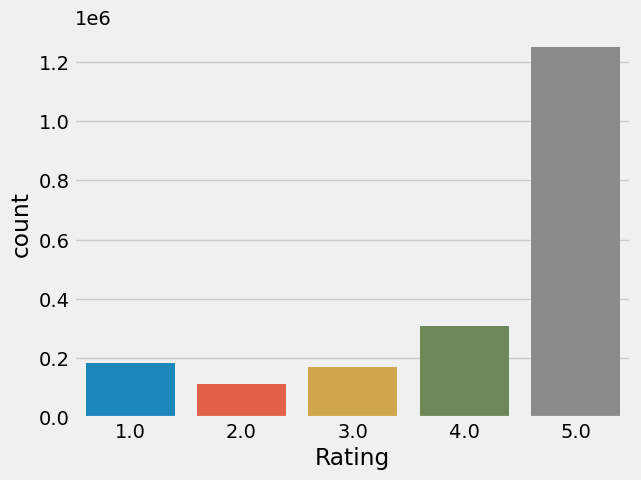

In [11]:
# display the number of each rating graphically
sns.countplot(x='Rating',data=amzn_ratings) 

The lowest rating is 2, which I did not expect.

In [12]:
# display the number of ratings per user
ratings_per_user = amzn_ratings.groupby('UserId')['Rating'].count().sort_values(ascending=False)
ratings_per_user.head()

UserId
A3KEZLJ59C1JVH    389
A281NPSIMI1C2R    336
A3M174IC0VXOS2    326
A2V5R832QCSOMX    278
A3LJLRIZL38GG3    276
Name: Rating, dtype: int64

<Axes: xlabel='UserId'>

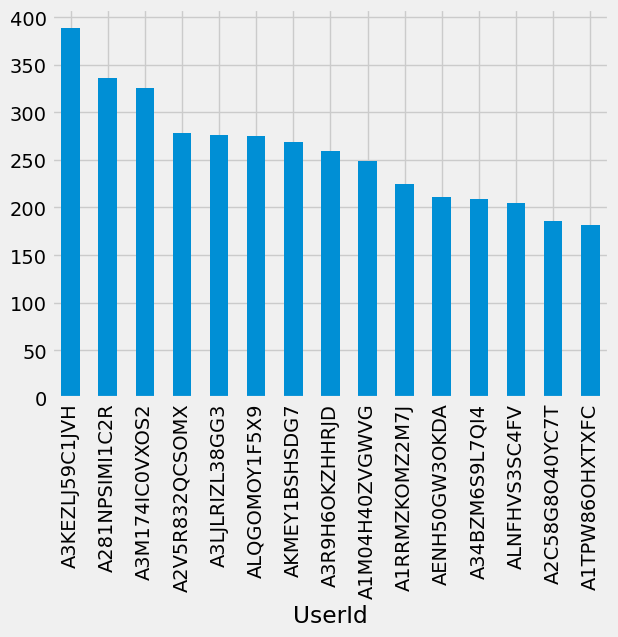

In [13]:
# plot the top 15 users
ratings_per_user.head(15).plot(kind = "bar")

We can see that UserID **A3KEZLJ59C1JVH** has ratted for 389 times, which is the highest one.

### **Lets's Explore the Ratings:**

In [14]:
amzn_ratings['Rating'].describe()

count    2.023070e+06
mean     4.149036e+00
std      1.311505e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [15]:
# display how many users submitted each rate
amzn_ratings.groupby('Rating')['UserId'].count() 

Rating
1.0     183784
2.0     113034
3.0     169791
4.0     307740
5.0    1248721
Name: UserId, dtype: int64

### **Let's explore the users:**

In [16]:
# determine the length of each rate
rate_of_5 = amzn_ratings[amzn_ratings.Rating==5]
rate_of_4 = amzn_ratings[amzn_ratings.Rating==4]
rate_of_3 = amzn_ratings[amzn_ratings.Rating==3]
rate_of_2 = amzn_ratings[amzn_ratings.Rating==2]
rate_of_1 = amzn_ratings[amzn_ratings.Rating==1]

In [17]:
# display the number of users for each rate
print('The number of users who rated 5 equals ',len(rate_of_5['UserId'].unique()))
print('The number of users who rated 4 equals ',len(rate_of_4['UserId'].unique()))
print('The number of users who rated 3 equals ',len(rate_of_3['UserId'].unique()))
print('The number of users who rated 2 equals ',len(rate_of_2['UserId'].unique()))
print('The number of users who rated 1 equals ',len(rate_of_1['UserId'].unique()))

The number of users who rated 5 equals  824697
The number of users who rated 4 equals  238261
The number of users who rated 3 equals  140097
The number of users who rated 2 equals  99470
The number of users who rated 1 equals  162401


## **Feature Engineering**

The next phase is used to create new features or dataframes from the existing dataset. It is necessary to gain more insights into the data.

One of the most important reasons why it is recommended to perform EDA first is that we could have a good understanding of data and the scope to create new features or dataframes.

In [18]:
# create a new dataframe with average rating 
df_ratings = pd.DataFrame(amzn_ratings.groupby('ProductId')['Rating'].mean().sort_values(ascending=False))

In [19]:
# create a new column with count of ratings given for each product
df_ratings['count of rating'] = pd.DataFrame(amzn_ratings.groupby('ProductId')['Rating'].count().sort_values(ascending=False))
df_ratings.sort_values('count of rating',ascending=False)

,Rating,count of rating
ProductId,,
B001MA0QY2,4.321386,7533
B0009V1YR8,3.568839,2869
B0043OYFKU,4.310456,2477
B0000YUXI0,4.405040,2143
B003V265QW,4.365421,2088
...,...,...
B0013H228W,5.000000,1
B0013GNAIE,5.000000,1
B0013GNAG6,5.000000,1


<Axes: xlabel='ProductId'>

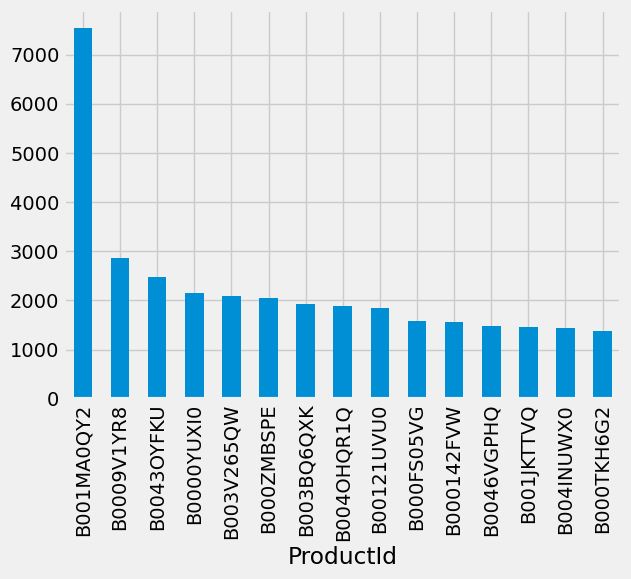

In [20]:
# plot the top 15 products
df_ratings['count of rating'].sort_values(ascending=False).head(15).plot(kind='bar')

There is a big difference between the highest product and the entire products. 

In [21]:
# create table to get frequency of ratings for products
ratings_freq = amzn_ratings.pivot_table(index='ProductId', columns='Rating', values='Timestamp', aggfunc='count', fill_value=0)
ratings_freq.columns = ['Rating ' + str(col) for col in ratings_freq.columns]
ratings_freq['Frequency'] = ratings_freq.sum(axis=1)

<Figure size 1400x1000 with 0 Axes>

<BarContainer object of 15 artists>

<BarContainer object of 15 artists>

<BarContainer object of 15 artists>

<BarContainer object of 15 artists>

<BarContainer object of 15 artists>

Text(0.5, 0, 'ProductID')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'B001MA0QY2'),
  Text(1, 0, 'B0009V1YR8'),
  Text(2, 0, 'B0043OYFKU'),
  Text(3, 0, 'B0000YUXI0'),
  Text(4, 0, 'B003V265QW'),
  Text(5, 0, 'B000ZMBSPE'),
  Text(6, 0, 'B003BQ6QXK'),
  Text(7, 0, 'B004OHQR1Q'),
  Text(8, 0, 'B00121UVU0'),
  Text(9, 0, 'B000FS05VG'),
  Text(10, 0, 'B000142FVW'),
  Text(11, 0, 'B0046VGPHQ'),
  Text(12, 0, 'B001JKTTVQ'),
  Text(13, 0, 'B004INUWX0'),
  Text(14, 0, 'B000TKH6G2')])

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Ratings Frequencies for the Products')

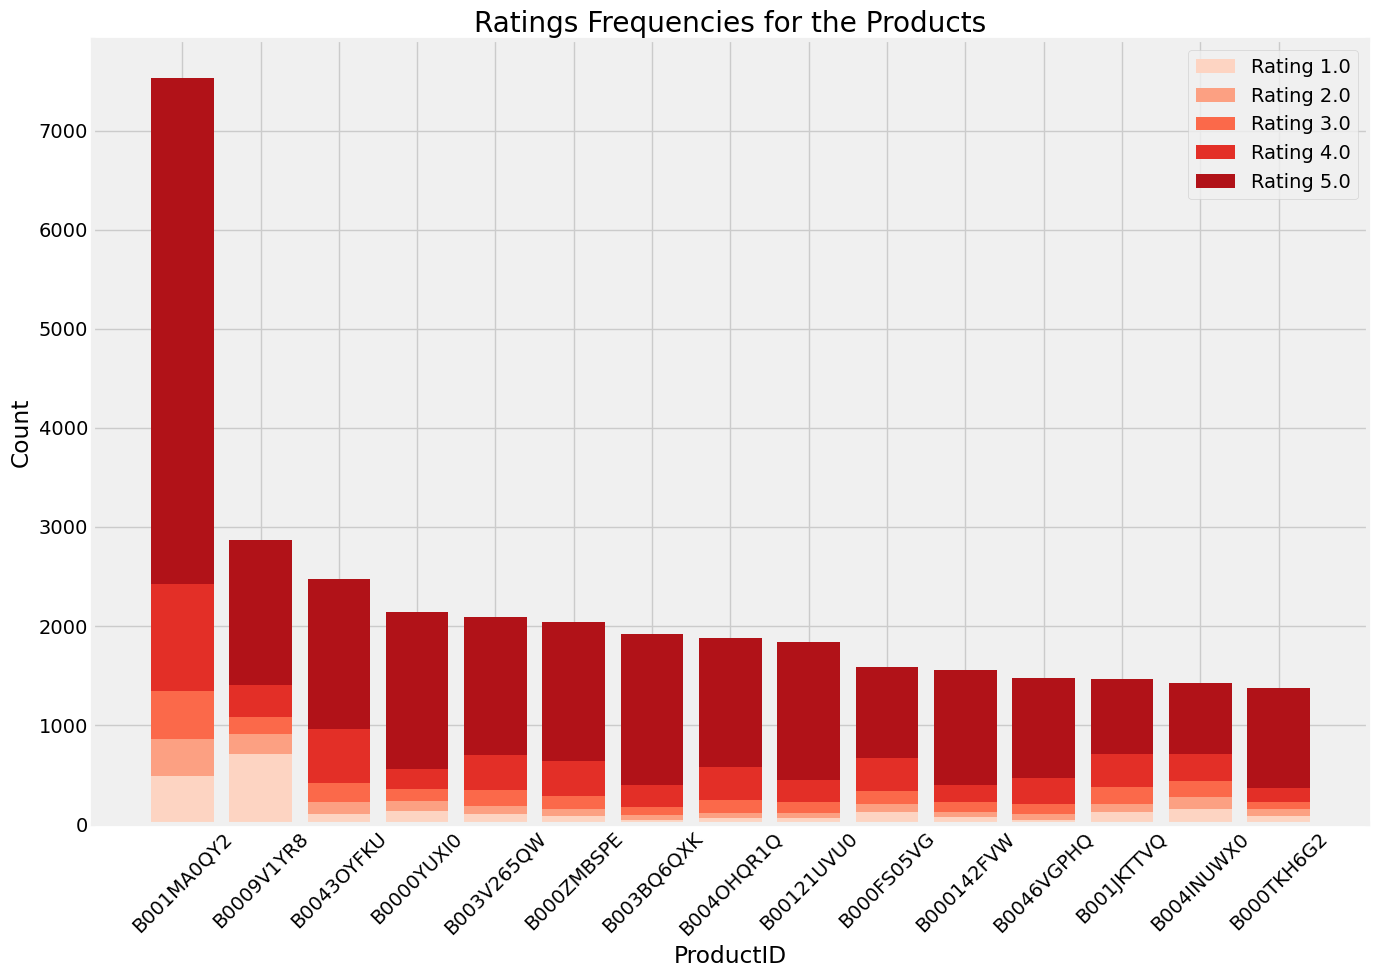

In [22]:
# extract information from the dataframe
df_ratings_freq = ratings_freq.sort_values('Frequency', ascending=False).head(15)

ratings = df_ratings_freq[['Rating 1.0', 'Rating 2.0', 'Rating 3.0', 'Rating 4.0', 'Rating 5.0']].values
productID = df_ratings_freq.index.values

# set a red color palette
col = sns.color_palette('Reds', n_colors=5)

# visualize the bar chart 
plt.figure(figsize=(14, 10), facecolor='w')
for i in range(5):
    plt.bar(productID, ratings[:, i], bottom=ratings[:, :i].sum(axis=1), color=col[i], label='Rating ' + str(i+1) + '.0')

plt.xlabel('ProductID')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Ratings Frequencies for the Products')
plt.tight_layout()
plt.legend(loc='upper right')

# display the plot
plt.show()

We can figure out that most rating has submitted for the top 15 products is 5.

In [23]:
# add a new column 'user_id' to the dataframe
amzn_ratings['user_id'] = pd.factorize(amzn_ratings['UserId'])[0]
amzn_ratings.head(5)

,UserId,ProductId,Rating,Timestamp,user_id
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200,0
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200,1
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200,2
3,A1WMRR494NWEWV,0733001998,4.0,1382572800,3
4,A3IAAVS479H7M7,0737104473,1.0,1274227200,4


In [24]:
# check length of 'UserId'
len(amzn_ratings['UserId'].unique())

1210271

In [25]:
# check length of 'user_id'
len(amzn_ratings['user_id'].unique())

1210271

The number of **'UserId'** and **'user_id'** is equal

In [26]:
# create table to get frequency of ratings for users
df_users_ratings = amzn_ratings.pivot_table(index='user_id', columns='Rating', aggfunc='size', fill_value=0)

# add a new column 'Frequency' to the dataframe
df_users_ratings['Frequency'] = df_users_ratings.sum(axis=1)

# rename the columns
df_users_ratings.columns = ['Rating ' + str(col) for col in df_users_ratings.columns]

# reset the index 
df_users_ratings = df_users_ratings.reset_index()
df_users_ratings = df_users_ratings.sort_values(by = 'Rating Frequency', ascending = False)

# assign the 'UserId' column as the index
df_users_ratings.set_index('user_id', inplace=True)

df_users_ratings.head(15)

,Rating 1.0,Rating 2.0,Rating 3.0,Rating 4.0,Rating 5.0,Rating Frequency
user_id,,,,,,
847,27,49,60,129,124,389
3905,0,0,16,38,282,336
2287,1,6,22,125,172,326
10293,4,13,20,67,174,278
107881,0,9,14,69,184,276
8351,183,6,6,3,77,275
4229,10,9,6,23,221,269
1822,7,24,46,75,107,259
45464,16,27,52,41,113,249


<Figure size 1800x1000 with 0 Axes>

<Axes: xlabel='user_id'>

Text(0.5, 0, 'UserId')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '847'),
  Text(1, 0, '3905'),
  Text(2, 0, '2287'),
  Text(3, 0, '10293'),
  Text(4, 0, '107881'),
  Text(5, 0, '8351'),
  Text(6, 0, '4229'),
  Text(7, 0, '1822'),
  Text(8, 0, '45464'),
  Text(9, 0, '47841'),
  Text(10, 0, '24363'),
  Text(11, 0, '6234'),
  Text(12, 0, '28789'),
  Text(13, 0, '1515'),
  Text(14, 0, '7899')])

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Ratings Frequencies for the Users')

<Figure size 1800x1000 with 0 Axes>

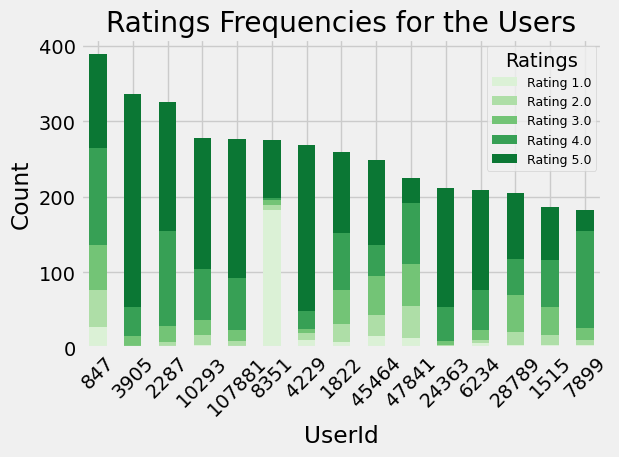

In [27]:
# set a red color palette
col = sns.color_palette('Greens', n_colors=5)

# visualize the bar chart 
plt.figure(figsize=(18, 10))
df_users_ratings[['Rating 1.0', 'Rating 2.0', 'Rating 3.0', 'Rating 4.0', 'Rating 5.0']].head(15).plot(kind='bar', stacked=True, color=col)

plt.xlabel('UserId')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Ratings Frequencies for the Users')
plt.tight_layout()
plt.legend(title='Ratings', fontsize=9, loc='upper right')

# display the plot
plt.show()

- As we can see, Rating 5 is the most submitted rating from the users.

- There is a difference between the users' behaviors. For example, UserID **3905** used rating 5 alot, where UserID **8351** has ratted with 1 alot.

- Maybe فhe reason behind this is that customers have different tastes and what they likeز

## **Recommender System**

#### **Model-based collaborative filtering system**

- Collaborative Filtering approach will be used to recommend items to user.

- Based on this, it will recommend items to user based on purchase history and similarity of ratings provided by other users who bought items.


In [28]:
# show a sample of data
amazon_ratings1 = amzn_ratings.head(10000)

In [29]:
# create a matrix
ratings_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)

In [30]:
# show the created matrix
ratings_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- The matrix shows all potential ratings that users could give to items.

- The ratings are arranged in a matrix format with users as rows and items as columns. 

- Most of the cells in the matrix are NaN because users only rate a small number of items.

- The empty cells are filled with 0s rather than missing data. 

- The goal is to predict how users would rate items they have not yet rated based on patterns in their existing ratings as well as ratings by similar users.

In [31]:
# check the shape of ratings_matrix
ratings_matrix.shape

(9697, 886)

The matrix has 9697 rows and 886 columns.

In [32]:
# transpose the matrix
Matrix = ratings_matrix.T

In [33]:
# show the matrix after trasposing it
Matrix.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# check the shape of matrix after trasposing it
Matrix.shape

(886, 9697)

As we can see, the shape of matrix has chnged to 886 rows and 9697 columns after trasposing it. 

In [35]:
# reduce the dimension of matrix
SVD = TruncatedSVD(n_components=10)
reduced_matrix = SVD.fit_transform(Matrix)

In [36]:
# check the shape after we reduced the dimensions
reduced_matrix.shape

(886, 10)

As we can see, after applying the TruncatedSVD on the matrix to reduce the dimensions, the shape became 886 rows and 10 columns.

#### **Correlation Matrix**


In [37]:
# determine the correlation coefficient
corr_matrix = np.corrcoef(reduced_matrix)

In [38]:
# check the shape of corr_matrix
corr_matrix.shape

(886, 886)

The shape of correlation matrix is 886 rows and 886 columns.

In [39]:
# choose an index to select ProductID randoly
X = random.randint(0,corr_matrix.shape[0])
X

363

In [41]:
# display the ProductID that corresponding to the index
prod_ID = Matrix.index[X]
prod_ID

'9790778260'

The ID of the product that the customer has purchased is 9790778260.

In [42]:
# show all the similar products to the item that the user purchase
corr_prod_ID = corr_matrix[X]
corr_prod_ID

array([-0.26376362, -0.86011219,  0.96762429, -0.99100247, -0.97137646,
       -0.49076889, -0.6738205 ,  0.93858021, -0.48997693,  0.83066297,
       -0.6738205 ,  0.82814502, -0.67586732, -0.54665728, -0.49076889,
       -0.6738205 , -0.6738205 , -0.85097643, -0.67586638, -0.63971497,
        0.80785492,  0.96788217, -0.67937641,  0.82766126,  0.80988893,
       -0.84228641, -0.84594093, -0.573715  ,  0.82766126, -0.83740897,
       -0.83571558, -0.49148077, -0.73565135, -0.84208584,  0.82799396,
       -0.49076889, -0.84208584, -0.36539632, -0.48934314, -0.57447718,
       -0.57446064, -0.84228641, -0.49120709, -0.49076889, -0.49076889,
       -0.49076889,  0.82766126, -0.49076889, -0.4901443 , -0.57447718,
       -0.96371937,  0.99176746, -0.84865891,  0.7093521 , -0.3049681 ,
        0.87560873,  0.92419619, -0.76272535, -0.89808653,  0.98319436,
        0.96711137, -0.98874953,  0.93286345,  0.73090854,  0.02538089,
        0.86843263,  0.16679514,  0.53567431, -0.25740279,  0.99

- The goal is to find all the products that are frequently purchased together with the items the customer has bought. 

- By identifying these correlated products, we can recommend additional purchase options to the customer that they may also be interested in, based on their initial purchases. 

- Rather than recommending random items, we want to suggest products that tend to be purchased together or appeal to similar interests or needs. Looking at correlation helps identify these complementary or related products to recommend.

In [43]:
# show similar products based on the purchase history of other users 
corr_prod = list(Matrix.index[corr_prod_ID > 0.90])

# remove the item already bought by the user
corr_prod.remove(prod_ID) 

In [44]:
# top 10 highly recommended products to the customer in sequence
corr_prod[0:9]

['0733001998',
 '130414089X',
 '1304482634',
 '1412759676',
 '1906987238',
 '3222000565',
 '322700075X',
 '3227001381',
 '4057362894']

- The recommendation system analyzed what items tend to be bought together or by similar customers to identify the top 10 products likely to be of interest to this particular customer. 

- The goal is to display the 10 products this customer is most likely to purchase, based on their initial purchases as well as the wisdom of the crowd from all other customer data. 

- The system predicts this customer will be most interested in these 10 ecommended products out of all the available options on the website. 